In [1]:
from project_utils import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from PIL import Image

In [2]:
train_x, train_y, valid_x, valid_y, test_x, test_y = load_data()
train_y = train_y.reshape(train_y.shape[0], -1).T
train_x = train_x.T

test_y = test_y.reshape(test_y.shape[0], -1).T
test_x = test_x.T

valid_y = valid_y.reshape(valid_y.shape[0], -1).T
valid_x = valid_x.T

In [3]:
train_x.shape

(10800, 600)

In [4]:
train_x = train_x/255
valid_x = valid_x/255
test_x = test_x/255

# Logistic Regression NN

In [5]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = True):
    # initialize parameters with zeros 
     w, b = np.zeros((X_train.shape[0], 1)), 0

     # Gradient descent 
     parameters, grads, costs = optimize_log(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

     # Retrieve parameters w and b from dictionary "parameters"
     w = parameters["w"]
     b = parameters["b"]

     # Predict test/train set examples 
     Y_prediction_test = predict_log(w, b, X_test)
     Y_prediction_train = predict_log(w, b, X_train)


     # Print train/test Errors
     print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
     print("valid accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


     d = {"costs": costs,
          "Y_prediction_test": Y_prediction_test, 
          "Y_prediction_train" : Y_prediction_train, 
          "w" : w, 
          "b" : b,
          "learning_rate" : learning_rate,
          "num_iterations": num_iterations}
     
     plt.plot(np.squeeze(costs))
     plt.ylabel('cost')
     plt.xlabel('iterations (per hundreds)')
     plt.title("Learning rate =" + "0.000005")
     plt.show()
     return d

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.268343
Cost after iteration 200: 0.204479
train accuracy: 95.83333333333333 %
valid accuracy: 95.5 %


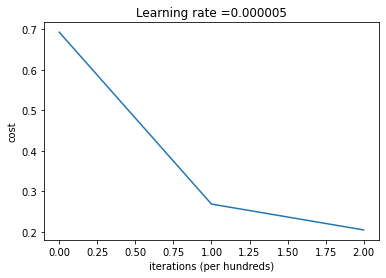

In [6]:
d = model(train_x, train_y, valid_x, valid_y, num_iterations = 300, learning_rate = 0.005, print_cost = True)

# Shallow NN

In [7]:
# X -- dataset of shape (2, number of examples)
# Y -- labels of shape (1, number of examples)
# n_h -- size of the hidden layer
# num_iterations -- Number of iterations in gradient descent loop
# print_cost -- if True, print the cost every 1000 iterations
# this function returns parameters learnt by the model. They can then be used to predict.

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    costs = []  
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)

        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate=0.0000001)
        
        # print(i)
        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + "0.000003")
    plt.show()

    return parameters

Cost after iteration 0: 0.693136
Cost after iteration 100: 0.693135
Cost after iteration 200: 0.693134
Cost after iteration 300: 0.693132
Cost after iteration 400: 0.693131
Cost after iteration 500: 0.693130
Cost after iteration 600: 0.693128
Cost after iteration 700: 0.693127
Cost after iteration 800: 0.693126
Cost after iteration 900: 0.693124
Cost after iteration 1000: 0.693123
Cost after iteration 1100: 0.693122
Cost after iteration 1200: 0.693121
Cost after iteration 1300: 0.693119
Cost after iteration 1400: 0.693118
Cost after iteration 1500: 0.693117
Cost after iteration 1600: 0.693115
Cost after iteration 1700: 0.693114
Cost after iteration 1800: 0.693113
Cost after iteration 1900: 0.693111


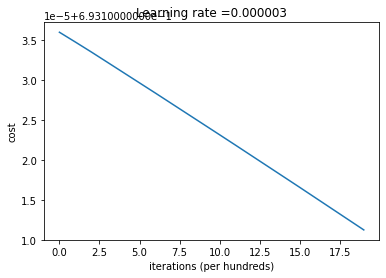

In [9]:
parameters = nn_model(train_x, train_y, n_h = 4, num_iterations = 2000, print_cost=True)

# Plot the decision boundary
# plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
# plt.title("Decision Boundary for hidden layer size " + str(4))

In [10]:
predictions = predict(parameters, valid_x)
print ('Accuracy: %d' % float((np.dot(valid_y,predictions.T) + np.dot(1-valid_y,1-predictions.T))/float(valid_y.size)*100) + '%')

Accuracy: 78%


## Two Layer Model

In [11]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.006, num_iterations = 3000, print_cost=False):#lr was 0.009

    np.random.seed(1)
    costs = []                         # keep track of cost
    parameters = initialize_parameters_deep(layers_dims)
    # print(parameters)
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
        
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters_deep(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        # if print_cost and i % 100 == 0:
        costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.678978
Cost after iteration 100: 0.403514
Cost after iteration 200: 0.334143
Cost after iteration 300: 0.287007
Cost after iteration 400: 0.250569
Cost after iteration 500: 0.221602
Cost after iteration 600: 0.198108
Cost after iteration 700: 0.184104
Cost after iteration 800: 0.170650
Cost after iteration 900: 0.160379
Cost after iteration 1000: 0.152783
Cost after iteration 1100: 0.143793
Cost after iteration 1200: 0.136805
Cost after iteration 1300: 0.130238
Cost after iteration 1400: 0.124554
Cost after iteration 1500: 0.119483
Cost after iteration 1600: 0.114667
Cost after iteration 1700: 0.110286
Cost after iteration 1800: 0.106814
Cost after iteration 1900: 0.102776
Cost after iteration 2000: 0.099314
Cost after iteration 2100: 0.096242
Cost after iteration 2200: 0.093495
Cost after iteration 2300: 0.090553
Cost after iteration 2400: 0.088238
Cost after iteration 2500: 0.085864
Cost after iteration 2600: 0.083848
Cost after iteration 2700: 0.081273
Cost

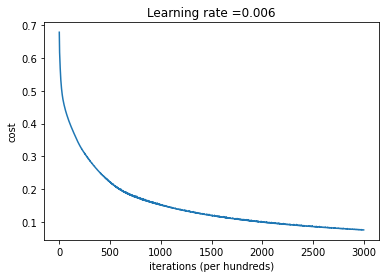

In [12]:
parameters_deep = L_layer_model(train_x, train_y, layers_dims = [10800, 7, 4, 1], num_iterations = 3000, print_cost=True)

In [13]:
pred_valid = predict_deep(valid_x, valid_y, parameters_deep)

In [14]:
pred_valid

0.9799999999999999

# HW 3

### Q1

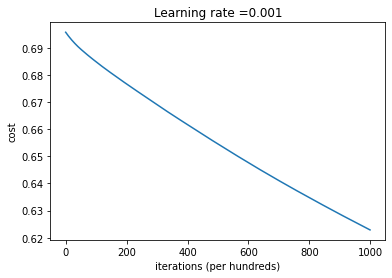

alpha = 0.001, first_layer_hidden_nodes = 4
Accuracy = 0.7849999999999999


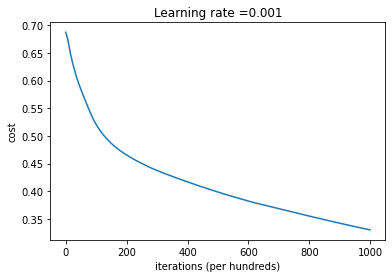

alpha = 0.001, first_layer_hidden_nodes = 8
Accuracy = 0.9149999999999999


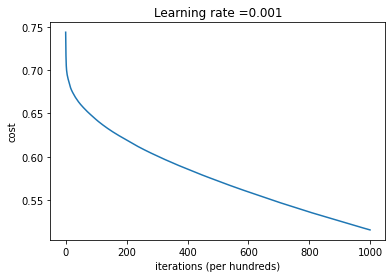

alpha = 0.001, first_layer_hidden_nodes = 12
Accuracy = 0.8999999999999999


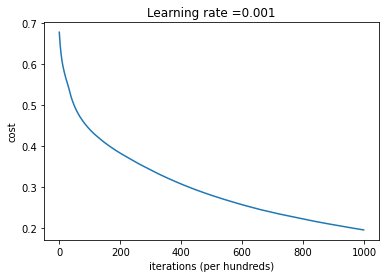

alpha = 0.001, first_layer_hidden_nodes = 16
Accuracy = 0.9199999999999999


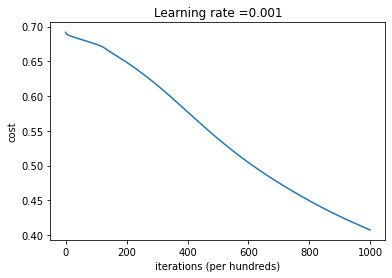

alpha = 0.001, first_layer_hidden_nodes = 20
Accuracy = 0.8949999999999999


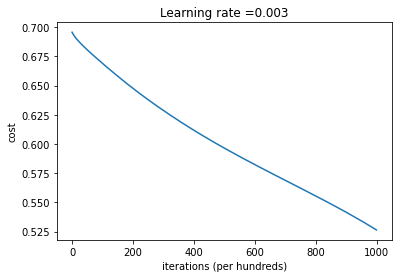

alpha = 0.003, first_layer_hidden_nodes = 4
Accuracy = 0.7849999999999999


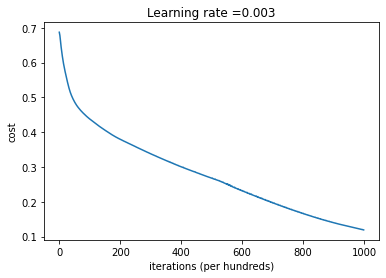

alpha = 0.003, first_layer_hidden_nodes = 8
Accuracy = 0.9599999999999999


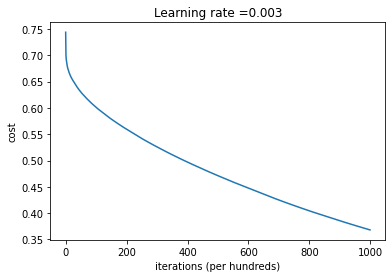

alpha = 0.003, first_layer_hidden_nodes = 12
Accuracy = 0.9099999999999999


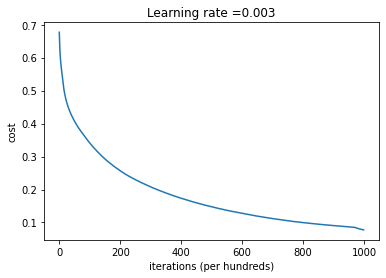

alpha = 0.003, first_layer_hidden_nodes = 16
Accuracy = 0.9599999999999999


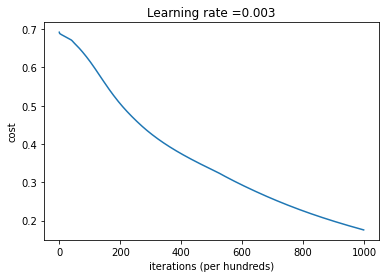

alpha = 0.003, first_layer_hidden_nodes = 20
Accuracy = 0.9599999999999999


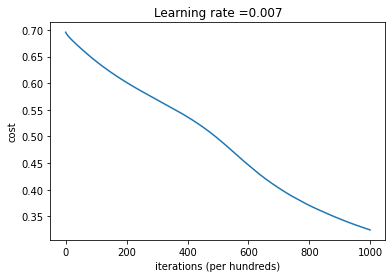

alpha = 0.007, first_layer_hidden_nodes = 4
Accuracy = 0.9149999999999999


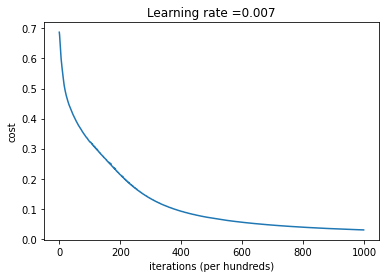

alpha = 0.007, first_layer_hidden_nodes = 8
Accuracy = 0.9799999999999999


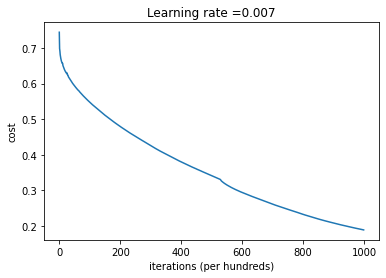

alpha = 0.007, first_layer_hidden_nodes = 12
Accuracy = 0.9899999999999999


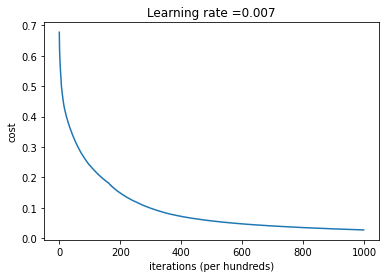

alpha = 0.007, first_layer_hidden_nodes = 16
Accuracy = 0.9799999999999999


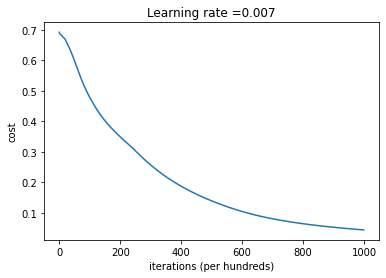

alpha = 0.007, first_layer_hidden_nodes = 20
Accuracy = 0.9799999999999999


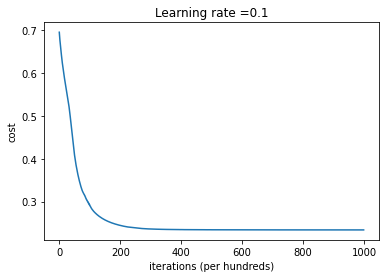

alpha = 0.1, first_layer_hidden_nodes = 4
Accuracy = 0.9149999999999999


c:\Users\akash\OneDrive\Documents\MSBA\Deep Learning\Project\project_utils.py:518: RuntimeWarning: divide by zero encountered in log
  cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
c:\Users\akash\OneDrive\Documents\MSBA\Deep Learning\Project\project_utils.py:608: RuntimeWarning: invalid value encountered in true_divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))


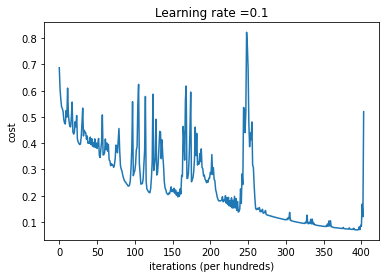

alpha = 0.1, first_layer_hidden_nodes = 8
Accuracy = 0.21500000000000002


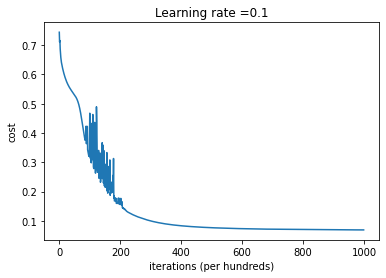

alpha = 0.1, first_layer_hidden_nodes = 12
Accuracy = 0.9749999999999999


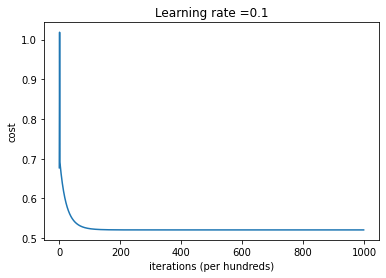

alpha = 0.1, first_layer_hidden_nodes = 16
Accuracy = 0.7849999999999999


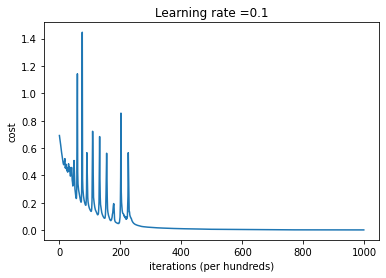

alpha = 0.1, first_layer_hidden_nodes = 20
Accuracy = 0.9899999999999999


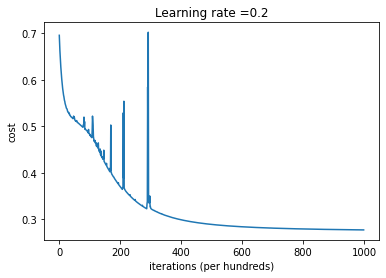

alpha = 0.2, first_layer_hidden_nodes = 4
Accuracy = 0.9099999999999999


c:\Users\akash\OneDrive\Documents\MSBA\Deep Learning\Project\project_utils.py:518: RuntimeWarning: divide by zero encountered in log
  cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
c:\Users\akash\OneDrive\Documents\MSBA\Deep Learning\Project\project_utils.py:608: RuntimeWarning: invalid value encountered in true_divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))


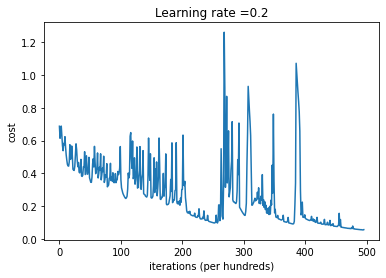

alpha = 0.2, first_layer_hidden_nodes = 8
Accuracy = 0.21500000000000002


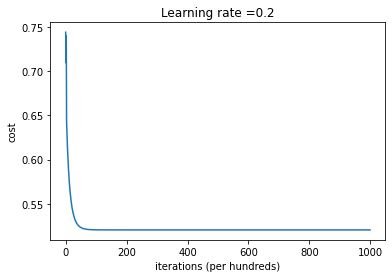

alpha = 0.2, first_layer_hidden_nodes = 12
Accuracy = 0.7849999999999999


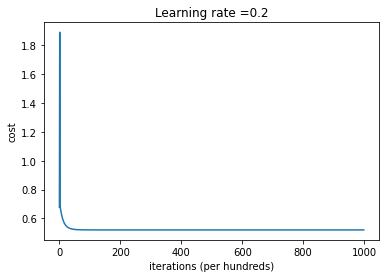

alpha = 0.2, first_layer_hidden_nodes = 16
Accuracy = 0.7849999999999999


c:\Users\akash\OneDrive\Documents\MSBA\Deep Learning\Project\project_utils.py:518: RuntimeWarning: divide by zero encountered in log
  cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
c:\Users\akash\OneDrive\Documents\MSBA\Deep Learning\Project\project_utils.py:608: RuntimeWarning: invalid value encountered in true_divide
  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))


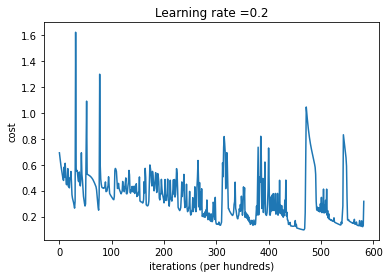

alpha = 0.2, first_layer_hidden_nodes = 20
Accuracy = 0.21500000000000002


In [15]:
alpha = [0.001, 0.003, 0.007, 0.1, 0.2]
n = [4, 8, 12, 16, 20]

for a in alpha:
    for n_h in n:
        parameters_deep = L_layer_model(train_x, train_y, layers_dims = [10800, n_h, 4, 1], learning_rate = a, num_iterations = 1000, print_cost=False)
        pred_train = predict_deep(valid_x, valid_y, parameters_deep)
        print(f"alpha = {a}, first_layer_hidden_nodes = {n_h}")
        print(f"Accuracy = {pred_train}")

<pre>       n </pre> 
| alpha | 4 | 8 | 12 | 16 | 20 |
| --- | --- | --- | --- | --- | --- |
| 0.001 | 0.7849 | 0.9149 | 0.8999 | 0.9199 | 0.8949
| 0.003 | 0.7849 | 0.9599 | 0.9099 | 0.9599 | 0.9599
| 0.007 | 0.9149 |  0.9799 | <span style="color:green">0.9899</span> | 0.9799 | 0.9799
| 0.1 | 0.9149 | 0.2150 | 0.9749 | 0.7849 | <span style="color:green">0.9899</span>
| 0.2 | 0.9099 | 0.2150 | 0.7849 | 0.7849 | 0.2150

As we can see our model is performing best when number of hidden nodes in the first layer is 12 and alpha is 0.007 the other best combination is alpha - 0.1 and number of hidden nodes as 20.

## Q2

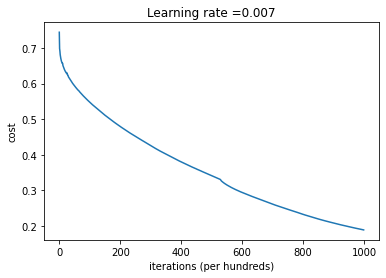

0.995

In [17]:
parameters_best = L_layer_model(train_x, train_y, layers_dims = [10800, 12, 4, 1], learning_rate = 0.007, num_iterations = 1000, print_cost=False)
pred_train = predict_deep(train_x, train_y, parameters_best)
pred_train


In [18]:
pred_valid = predict_deep(valid_x, valid_y, parameters_best)
pred_valid

0.9899999999999999

As we can see our model is giving us almost the same accuracy in both train and validation set. It means our model is just right. Our validation accuracy is a little bit less than the training score. Moreover, the accuracy score is very high i.e. 97.9% hence we come to a conclusion that our model is neither overfitting nor underfitting.

### Q3

In [19]:
def L_layer_model(X, Y, layers_dims, lambd = 0, learning_rate = 0.006, num_iterations = 3000, print_cost=False):#lr was 0.009
    np.random.seed(1)
    costs = []                         # keep track of cost
    parameters = initialize_parameters_deep(layers_dims)
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # print(len(caches))
        # break
        # Compute cost.
        if lambd == 0:
            cost = compute_cost(AL, Y)
        else:
            cost = compute_cost_with_regularization(AL, Y, parameters, lambd)
        
        # Backward propagation.
        if lambd == 0:
            grads = L_model_backward(AL, Y, caches)
        else:
            grads = L_model_backward(AL, Y, caches, lambd)
        # Update parameters.
        parameters = update_parameters_deep(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        # if print_cost and i % 100 == 0:
        costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

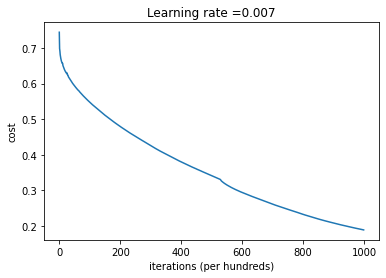

In [22]:
model_non_regularized = L_layer_model(train_x, train_y, layers_dims = [10800, 12, 4, 1], lambd = 0, learning_rate = 0.007, num_iterations = 1000, print_cost=False)

In [23]:
pred_train_non_reg = predict_deep(train_x, train_y, model_non_regularized)
pred_valid_non_reg = predict_deep(valid_x, valid_y, model_non_regularized)

print(pred_train_non_reg, pred_valid_non_reg)

0.995 0.9899999999999999


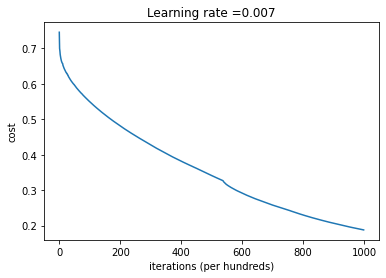

In [24]:
model_regularized = L_layer_model(train_x, train_y, layers_dims = [10800, 12, 4, 1], lambd = 0.1, learning_rate = 0.007, num_iterations = 1000, print_cost=False)


In [20]:
pred_train_reg = predict_deep(train_x, train_y, model_regularized)
pred_valid_reg = predict_deep(valid_x, valid_y, model_regularized)

print(pred_train_reg, pred_valid_reg)

0.9766666666666668 0.9749999999999999


**lambda**| 0 | 0.1 |
 ---       | -- | -- |
**Train** | 99.5 | 98.9 |
**Valid**| 97.6 | 97.5 |

The L2 regularization didn't have much effect on our model as the accuracy score is more or less the same. Moreover, the accuracy decreased in the case of L2 regularization. The positive side of L2 regularization is the difference between training and validation score has reduced a lot.

## Q4

In [31]:
def get_predictions(X, parameters):
    
    m = X.shape[1]
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    return p

In [29]:
pred_test = predict_deep(test_x, test_y, model_non_regularized)
pred_test

0.9799999999999999

In [32]:
predictions = get_predictions(test_x, model_non_regularized)

In [38]:
predictions.T.shape

(200, 1)

<AxesSubplot:>

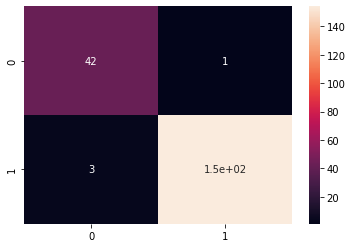

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(test_y.T, predictions.T), annot = True)  

The test score on our best model is 96.5%. This means our model is correct 96.5% of times in predicting if an X-ray has a cancerous tissue or not. This is a very high score given the human error rate is around 2-3%. Therefore, we can say that our model is performing very well. We can also visualize that in our confusion matrix, there are very few false positives and false negatives.